# 类和对象
现在你已经通过前两章看到了Scala中类和对象的基本操作。本章将带你更深入地探索这个话题，你将会了解到更多关于类、字段和方法的内容，以及Scala对分号的自动推断。我们将介绍单例对象（singleton object），包括如何用它们来编写和运行Scala应用程序。如果你对Java熟悉，你会发现Scala中这些概念是相似的，但并不完全相同。因此即便你是Java大牛，阅读本章的内容也是有帮助的。

## 类、字段和方法
类是对象的蓝本（blueprint）。一旦你定义好一个类，就可以用n e w关键字从这个类蓝本创建对象。

In [1]:
class ChecksumAccumulator{
    var sum = 0
}
val acc = new ChecksumAccumulator
val csa = new ChecksumAccumulator

defined class ChecksumAccumulator
acc: ChecksumAccumulator = ammonite.$sess.cmd0$Helper$ChecksumAccumulator@14808ec
csa: ChecksumAccumulator = ammonite.$sess.cmd0$Helper$ChecksumAccumulator@1a192ce

那么内存中这两个对象看上去可能是这个样子的：
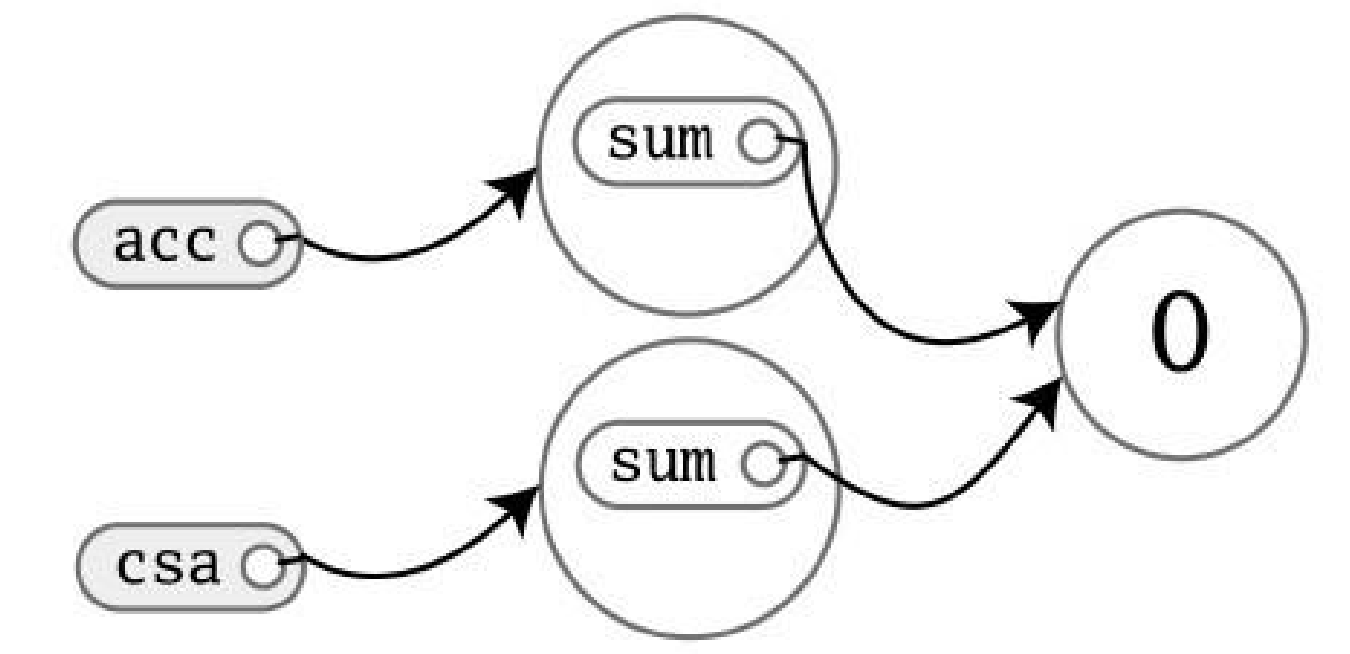

由于sum这个定义在ChecksumAccumulator类中的字段是var，而不是val，可以在后续代码中对其重新赋予不同的Int值，如：

In [ ]:
acc.sum = 3

如此一来内存中的对象看上去就如同：
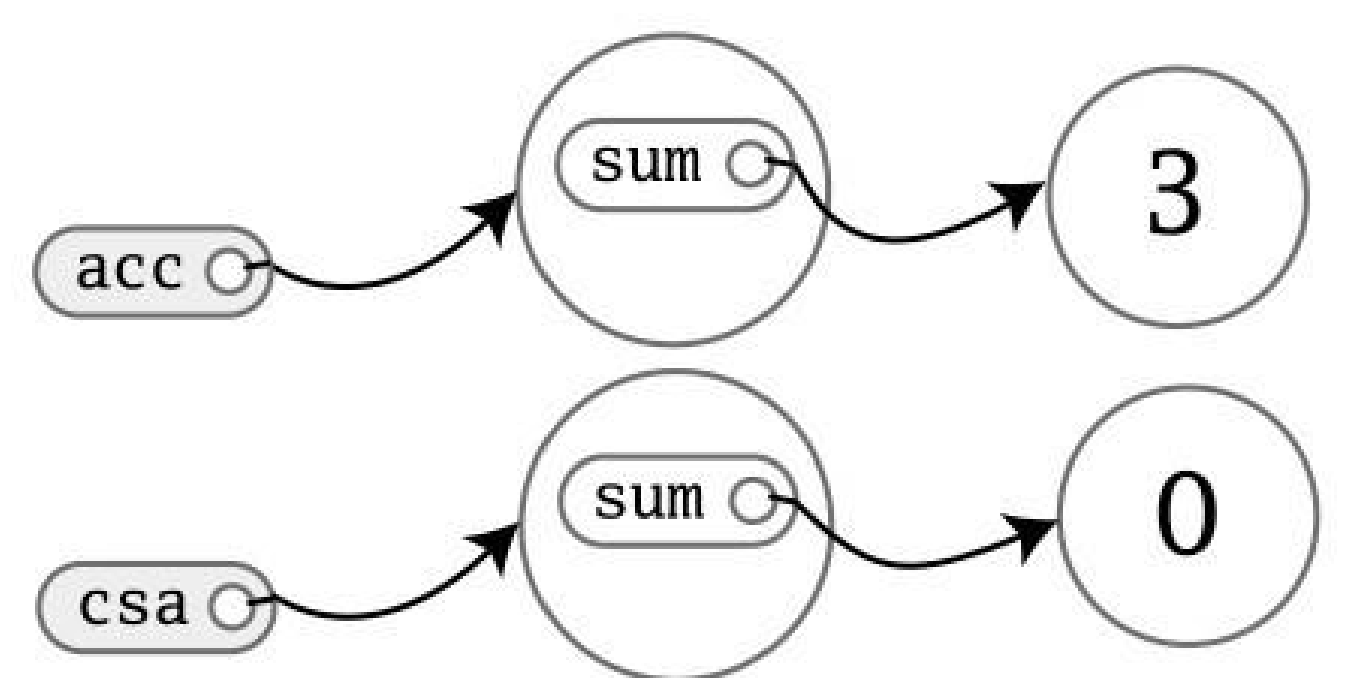

关于这张图需要注意的一点是总共有两个sum变量，一个位于acc指向的对象里，而另一个位于csa指向的对象里。**字段又叫作实例变量（instance variable）**，因为每个实例都有自己的变量。这些实例变量合在一起，构成了对象在内存中的映像。从图中不难看出，不光是有两个sum变量，而且当你改变其中一个的值的时候，另一个并不会受到影响。  
本例中另一个值得注意的是可以修改acc指向的对象。尽管acc本身是val，由于acc和csa都是val而不是var，你不能做的是将它们重新赋值指向别的对象。例如，如下代码会报错：

In [ ]:
//不能编译，因为acc是个val
acc = new ChecksumAccumulator

因此，你能够确信的是，acc永远指向那个你在初始化的时候用的ChecksumAccumulator对象，但随着时间推移这个对象中包含的字段是有可能改变的。

追求健壮性的一个重要手段是确保对象的状态（它的实例变量的值）在其整个声明周期都是有效的。首先是通过将字段标记为私有（private）来防止外部直接访问字段。因为私有字段只能被定义在同一个类中的方法访问，所有对状态的更新操作的代码，都在类的内部。要将某个字段声明为私有，可以在字段前加上private这个访问修饰符，如：

In [ ]:
class ChecksumAccumulator{
    private var sum = 0
}

有了ChecksumAccumulator的定义，任何试图通过外部访问sum的操作都会失败：

In [ ]:
val acc = new ChecksumAccumulator
acc.sum = 5

***注意***

在Scala中，使得成员允许公共访问（public）的方式是不在成员前面显式地给出任何访问修饰符。换句话说，对于那些在Java中可能会用“public”的地方，到了Scala中，什么都不说就对了。**公共访问是Scala的默认访问级别**。

由于sum是私有的，唯一能访问sum的代码都定义在类自己里面。因此， ChecksumAccumulator对于别人来说没什么用处，除非给它定义一些方法：

ChecksumAccumulator现在有两个方法，add和checksum，都是函数定义的基本形式，如图3.1（36页）所展示的那样。

传递给方法的任何参数都能在方法内部使用。Scala方法参数的一个重要特征是它们都是val而不是var。[1]因此，如果你试图在Scala的方法中对入参重新赋值，编译会报错：

In [ ]:
class ChecksumAccumulator{
    private var sum = 0
    def add(b: Byte): Unit = {
        //b = 1 //不能编译，因为b是一个val
        sum += b
    }
    def checksum(): Int = {
        return ~(sum & 0xFF) + 1
    }
}

In [ ]:
val acc = new ChecksumAccumulator
acc.add(0)
println(acc.checksum())

虽然当前版本的ChecksumAccumulator中，add和checksum正确地实现了预期的功能，还可以用更精简的风格来表达。首先，checksum方法最后的return是多余的，可以去掉。在没有任何显式的return语句时，Scala方法返回的是该方法计算出的最后一个（表达式的）值。

事实上我们推荐的方法风格是避免使用任何显式的return语句，尤其是多个return语句。与此相反，尽量将每个方法当作是一个最终交出某个值的表达式。这样的哲学鼓励你编写短小的方法，将大的方法拆成小的。另一方面，设计中的选择也是取决于上下文的，Scala也允许你方便地编写有多个显式return的方法，如果那确实是你想要的。

由于checksum所做的全部就是计算一个值，它并不需要显式的return。另一种方法简写的方式是，当一个方法只会计算一个返回结果的表达式时，可以不写花括号。如果这个表达式很短，它甚至可以被放置在def的同一行。为了极致的精简，还可以省略掉结果类型，Scala会帮你推断出来。做出这些修改之后，ChecksumAccumulator类看上去是这个样子的：

In [ ]:
class ChecksumAccumulator{
    private var sum = 0
    def add(b: Byte) = sum += b
    def checksum() = ~(sum & 0xFF) + 1
}

在前面的示例中，虽然Scala能够正确地推断出add和checksum这两个方法的结果类型，这段代码的读者也需要通过研读方法体中的代码在脑海里推断（mentally infer）这些结果类型。正因如此，通常更好的做法是对类中声明为公有的方法显式地给出结果类型，哪怕编译器可以帮你推断出来。示例4.1展示了这种风格：

In [ ]:
class ChecksumAccumulator{
    private var sum = 0
    def add(b: Byte) : Unit = sum += b
    def checksum() : Int = ~(sum & 0xFF) + 1
}

结果类型为Unit的方法，如ChecksumAccumulator的add方法，执行它们的目的是为了它们的副作用。副作用通常来说指的是改变方法外部的某种状态或者执行I/O的动作。对本例的add而言，其副作用是给sum重新赋值。那些仅仅因为其副作用而被执行的方法被称作过程（procedure）。

## 分号判断
在Scala程序中，每条语句最后的分号通常是可选的。你想要的话可以键入一个，但如果当前行只有这条语句，分号并不是必需的。另一方面，如果想在同一行包含多条语句，那么分号就有必要了：

In [ ]:
val s = "hello";println(s)

如果想要一条跨多行的语句，大多数情况下直接换行即可，Scala会帮助你在正确的地方断句。例如，如下代码会被当作一条四行的语句处理：

In [ ]:
val x = 4
if(x<2)
    println("too small")
else
    println("ok")

不过偶尔Scala也会背离你的意图，在不该断句的地方断句：

这段代码会被解析成两条语句x和+y。如果希望编译器解析成单条语句x+ y，可以把语句包在圆括号里：

或者也可以将+放在行尾。正是由于这个原因，当用中缀（infix）操作符比如+来串接表达式时，一个常见的Scala风格是将操作符放在行尾而不是行首：

In [ ]:
val x = 1
val y = 2
x
+ y

(x
+ y)

x +
y

***分号推断的规则***

相比分号推断的效果，（自动）分隔语句的精确规则简单得出人意料。概括地说，除非以下任何一条为true，代码行的末尾就会被当作分号处理：

1.当前行以一个不能作为语句结尾的词结尾，比如英文句点或中缀操作符。  
2.下一行以一个不能作为语句开头的词开头。  
3.当前行的行尾出现在圆括号（...）或方括号[...]内，因为再怎么说圆括号和方括号也不能（直接）包含多条语句。

## 单例对象
正如我们在第1章提到的，Scala比Java更面向对象的一点，是Scala的类不允许有静态（static）成员。对此类使用场景，Scala提供了单例对象（singleton object）。单例对象的定义看上去跟类定义很像，只不过class关键字被换成了object关键字。参考示例4.2。

在图中的单例对象名叫ChecksumAccumulator，跟前一个例子中的类名一样。当单例对象跟某个类共用同一个名字时，它被称作这个类的伴生对象（companion object）。必须在同一个源码文件中定义类和类的伴生对象。同时，类又叫作这个单例对象的伴生类（companion class）。类和它的伴生对象可以互相访问对方的私有成员。

In [10]:
import scala.collection.mutable
class ChecksumAccumulator{
    private var sum = 0
    def add(b: Byte) : Unit = sum += b
    def checksum() : Int = ~(sum & 0xFF) + 1
}
object ChecksumAccumulator {
    private val cache = mutable.Map.empty[String,Int]
    def calculate(s:String) : Int = {
        if(cache.contains(s))
        {
            println(s + " is in cache!")
            cache(s)
        }
        else {
            val acc = new ChecksumAccumulator
            for(c <- s)
                acc.add(c.toByte)
            val cs = acc.checksum()
            cache += (s -> cs)
            cs
        }
    }
}

import scala.collection.mutable

defined class ChecksumAccumulator
defined object ChecksumAccumulator

ChecksumAccumulator单例对象有一个名为calculate的方法，接收一个String，计算这个String的所有字符的校验和（checksum）。它同样也有个私有的字段，cache，这是一个缓存了之前已计算过的校验和。[2]方法的第一行，“if （cache.contains（s））”，检查缓存看是否传入的字符串已经包含在映射当中了。如果是，那么就返回映射的值，即cache（s）；如果没有，则执行else子句，计算校验和。else子句的第一行定义了一个名为acc的val，用一个新的ChecksumAccumulator实例初始化。[3]接下来的一行是一个for表达式，遍历传入字符串的每一个字符，通过调用toByte方法将字符转成Byte，然后将Byte传给acc指向的ChecksumAccumulator实例的add方法。在for表达式执行完成以后，方法的下一行调用acc的checksum，从传入的String得到其校验和，保存到名为cs的val。再往下一行，cache += （s-> cs），传入的字符串作为键，计算出的整型的校验和作为值，这组键值对被添加到缓存映射当中。该方法的最后一个表达式，即cs，确保了该方法的结果是这个校验和。

如果你是Java程序员，可以把单例对象当作是用于安置那些用Java时打算编写的静态方法。可以用类似的方式来访问单例对象的方法：单例对象名、英文句点和方法名。例如，可以像这样来调用ChecksumAccumulator这个单例对象的calculate方法：

In [12]:
ChecksumAccumulator.calculate("Every value is a object")
ChecksumAccumulator.calculate("Every value is a object")

Every value is a object is in cache!
Every value is a object is in cache!


res11_0: Int = -92
res11_1: Int = -92

不过，单例对象并不仅仅是用来存放静态方法。它是一等的对象。可以把单例对象的名称想象成附加在对象身上的“名字标签”：
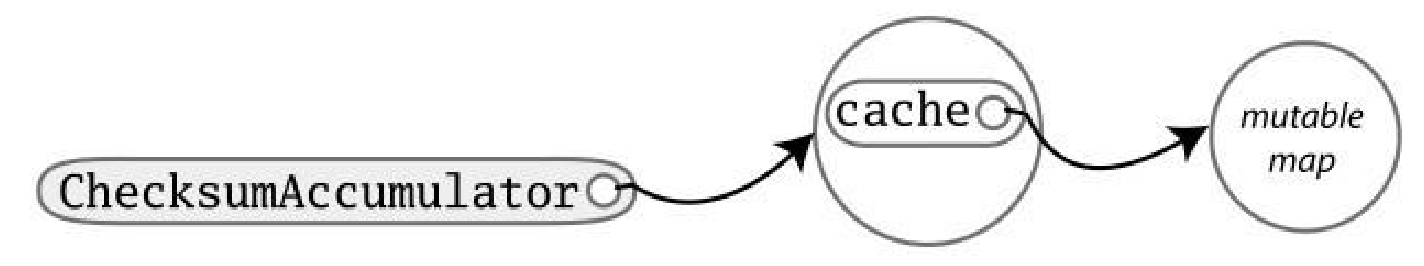

定义单例对象并不会定义类型（在Scala的抽象层级上是这样）。当只有ChecksumAccumulator的对象定义时，并不能定义一个类型为ChecksumAccumulator的变量。**确切地说，名为ChecksumAccumulator的类型是由这个单例对象的伴生类来定义的**。不过，单例对象可以扩展自某个超类，还可以混入特质，可以通过这些类型来调用它的方法，用这些类型的变量来引用它，还可以将它传入那些预期这些类型的入参的方法当中。我们将在第13章给出单例对象继承类和特质的示例。

类和单例对象的一个区别是**单例对象不接收参数**，而类可以。由于你没法用new实例化单例对象，也就没有任何手段来向它传参。每个单例对象都是通过一个静态变量引用合成类（synthetic class）的实例来实现的，因此单例对象从初始化的语义上跟Java的静态成员是一致的。[4]尤其体现在，单例对象在有代码首次访问时才被初始化。

**没有同名的伴生类的单例对象称为孤立对象（standalone object）**。孤立对象有很多种用途，包括将工具方法归集在一起，或定义Scala应用程序的入口等。下一节我们将展示这样的用法。

## Scala应用程序
要运行一个Scala程序，必须提供一个独立对象的名称。这个独立对象需要包含一个main方法，该方法接收一个Array[String]作为参数，结果类型为Unit。任何带有满足正确签名的main方法的独立对象都能被用作应用程序的入口。如示例4.3所示：

In [14]:
import ChecksumAccumulator.calculate
object Summer {
    def main(args: Array[String]): Unit = {
        for(arg <- args)
            println(arg + ": " + calculate(arg))
    }
}

Summer.main(Array("of","love"))

of: -213
love: -182


import ChecksumAccumulator.calculate

defined object Summer

示例4.3中单例对象的名称是Summer。它的main方法带有正确的签名，因此可以将它当作应用程序来使用。文件中的第一条语句引入了前一例的ChecksumAccumulator对象中定义的calculate方法。这句引入让你可以在这个文件后续的代码中使用这个方法的简单名称。[5]main方法的方法体只是简单地打印出每个参数，以及参数的校验和，以冒号分隔开。

***注意***

Scala在每一个Scala源码文件都隐式地引入了java.lang和scala包的成员，以及名为Predef的单例对象的所有成员。位于scala包的P r e d e f包含了很多有用的方法。比如，当你在Scala源码中使用println时，实际上调用了Predef的println（Predef. println转而调用Console.println，执行具体的操作）。而当你写下assert时，实际上是调用了Predef.assert。

要运行Summer这个应用程序，可以把示例4.3中的代码放入名为Summer.scala的文件中。因为Summer也用到ChecksumAccumulator，将示例4.1中的类和示例4.2中的伴生对象放入名为ChecksumAccumulator.scala的文件中。

Scala和Java的区别之一，是Java要求你将公共的类放入跟类同名的文件中（例如需要将SpeedRacer类放到SpeedRacer.java中），而在Scala中可以任意命名.scala文件，不论你放什么类或代码到这个文件中。不过，通常对于那些非脚本的场景，把类放入以类名命名的文件是推荐的做法，就像Java那样，以便程序员能够更容易地根据类名定位到对应的文件。这也是我们在命名Summer.scala和ChecksumAccumulator.scala时所采取的策略。

ChecksumAccumulator.scala和Summer.scala都不是脚本，因为它们都是以定义结尾的。而脚本则不同，必须以一个可以计算出结果的表达式结尾。因此，如果你尝试以脚本的方式运行Summer.scala，解释器会报错，提示你Summer.scala并不以一个结果表达式结尾（当然这是假定你并没有在Summer对象定义之后自己再添加任何额外的表达式）。需要用Scala编译器实际编译这些文件，然后运行编译出来的类。编译的方式之一，是使用scalac这个基础的Scala编译器，就像这样：
```shell
$ scalac ChecksumAccumulator.scala Summer.scala
```
这将编译你的源文件，不过在编译结束之前，你可能会注意到一个比较明显的延迟。这是因为每一次编译器启动，它都会花时间扫描jar文件的内容以及执行其他一些初始化工作，然后才开始关注你提交给它的新的源码文件。因为这个原因，Scala的分发包还包含了一个名为fsc的Scala编译器的守护进程（daemon）。使用的方式如下：
```shell
$ fsc ChecksumAccumulator.scala Summer.scala
```
第一次运行fsc，它会创建一个本地的服务器守护进程，绑定到计算机的某个端口上。然后，它会通过这个端口将需要编译的文件发送给这个守护进程。下一次运行fsc的时候，这个守护进程已经在运行了，所以fsc会简单地将文件清单发给这个守护进程，然后守护进程就会立即编译这些文件。使用fsc，只有在首次运行时才需要等待Java运行时启动。如果你想要停止f s c这个守护进程，可以执行fsc -shutdown。
不论是运行scalac还是fsc命令，都会产出Java类文件，这些类文件可以用scala命令来运行，这个命令也是你在之前的示例中用来执行解释器的那一个。不过，跟之前我们运行那些带有Scala代码的.scala文件不同，[6]在这个使用场景下，你给它的是那个包含了符合正确签名要求的main方法的独立对象的名字。因此，可以用下面的命令来运行Summer这个应用程序：
```shell
$ scala Summer of love
```
你将看到这个程序打印出了传入的两个命令行参数对应的校验和：  
of: -213  
love: -182

## App特质
Scala提供了一个特质scala.App，帮助你节省敲键盘的动作。我们还没有介绍完那些你要理解这个特质工作原理的所有知识点，但是我们觉得你现在可能也并不迫切想要知道。示例4.4给出了一个例子：

In [18]:
import ChecksumAccumulator.calculate
object FallWinterSpringSummer extends App {
    for(season <- List("fall", "winter","spring"))
        println(season + ": " + calculate(season))
}


import ChecksumAccumulator.calculate

defined object FallWinterSpringSummer

## 结语
本章介绍了Scala类和对象的基础，并向你展示了如何编译和运行应用程序。在下一章，你将会了解到更多关于Scala基础类型和用法的内容。

[1].参数采用val的原因是val更容易推敲，不需要像var那样进一步查证val是不是被重新赋值过。  
[2].我们在这里用了一个缓存来展示带有字段的实例对象。类似这样的缓存是以牺牲内存换取计算时间的方式来提升性能的。通常来说，只有当你遇到缓存能解决的性能问题时才会用到这样的缓存，并且你可能会用一个弱引用的映射，比如scala.collection.jcl的WeakHaskMap，以便内存吃紧时，缓存中的条目可以被垃圾回收掉。  
[3].由于new关键字仅被用于实例化类，这里创建的对象是ChecksumAccumulator类的实例，而不是相同名字的那个单例对象。  
[4].合成类的名称为对象名加上美元符。因此名为ChecksumAccumulator的单例对象的合成类就是ChecksumAccumulator$。  
[5].如果你是Java程序员，可以把这句引入语句当作是Java 5的静态引入（static import）功能。Scala跟Java静态引入的区别在于可以从任何对象引入成员，而不仅仅是从单例对象。  
[6].scala用来“解释”一个Scala源文件的实际机制是它会先把Scala源代码变异成Java字节码，然后马上通过类加载器加载，并执行它们。